In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,1226990,0,0,wisarddlwthecoder,9,8,1,5.7,"November 1, 2021",I got this game when it was in beta. a bit on ...
1,1226990,0,0,76561198295807689,14,7,1,9.1,"October 29, 2021","I can't say how perfect is this game, I recomm..."
2,1226990,0,0,76561199134967712,12,4,1,8.4,"October 27, 2021",if you like survivel and automation games this...
3,1226990,0,0,76561198150885131,22,1,1,65.8,"October 25, 2021","This is an amazing game and I love playing it,..."
4,1226990,1,0,76561198382448797,35,5,-1,22.0,"October 18, 2021",I LOVE this game but there are so many bugs (d...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,5.7,"November 1, 2021",I got this game when it was in beta. a bit on ...
1,0,0,1,9.1,"October 29, 2021","I can't say how perfect is this game, I recomm..."
2,0,0,1,8.4,"October 27, 2021",if you like survivel and automation games this...
3,0,0,1,65.8,"October 25, 2021","This is an amazing game and I love playing it,..."
4,1,0,-1,22.0,"October 18, 2021",I LOVE this game but there are so many bugs (d...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"November 1, 2021",I got this game when it was in beta. a bit on ...,0,0,5.7,1
1,"October 29, 2021","I can't say how perfect is this game, I recomm...",0,0,9.1,1
2,"October 27, 2021",if you like survivel and automation games this...,0,0,8.4,1
3,"October 25, 2021","This is an amazing game and I love playing it,...",0,0,65.8,1
4,"October 18, 2021",I LOVE this game but there are so many bugs (d...,1,0,22.0,-1
5,"October 17, 2021",The new update is simply trash.,3,0,114.4,-1
6,"October 12, 2021",WOW,0,0,17.0,1
7,"September 19, 2021",super gooooooooooooooooooooooood game,0,0,6.9,1
8,"September 16, 2021",do not buy i have an rtx 80000 and with 15 ext...,1,1,26.7,1
9,"September 6, 2021","A fun little survival crafting game, you're a ...",0,0,8.1,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  304 non-null    object 
 1   Review_Text     302 non-null    object 
 2   Num_Helpful     304 non-null    int64  
 3   Num_Funny       304 non-null    int64  
 4   Hours_Played    304 non-null    float64
 5   Recommend       304 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 14.4+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_22964/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"November 1, 2021",I got this game when it was in beta. a bit on ...,0,0,5.7,1,1635724800
1,"October 29, 2021","I can't say how perfect is this game, I recomm...",0,0,9.1,1,1635465600
2,"October 27, 2021",if you like survivel and automation games this...,0,0,8.4,1,1635292800
3,"October 25, 2021","This is an amazing game and I love playing it,...",0,0,65.8,1,1635120000
4,"October 18, 2021",I LOVE this game but there are so many bugs (d...,1,0,22.0,-1,1634515200


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_22964/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",I got this game when it was in beta. a bit on ...,0,0,5.7,1,1635724800,2704
1,"October 29, 2021","I can't say how perfect is this game, I recomm...",0,0,9.1,1,1635465600,2704
2,"October 27, 2021",if you like survivel and automation games this...,0,0,8.4,1,1635292800,2703
3,"October 25, 2021","This is an amazing game and I love playing it,...",0,0,65.8,1,1635120000,2703
4,"October 18, 2021",I LOVE this game but there are so many bugs (d...,1,0,22.0,-1,1634515200,2702


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",I got this game when it was in beta. a bit on ...,0,0,5.7,1,1635724800,2704
1,"October 29, 2021","I can't say how perfect is this game, I recomm...",0,0,9.1,1,1635465600,2704
2,"October 27, 2021",if you like survivel and automation games this...,0,0,8.4,1,1635292800,2703
3,"October 25, 2021","This is an amazing game and I love playing it,...",0,0,65.8,1,1635120000,2703
4,"October 18, 2021",I LOVE this game but there are so many bugs (d...,1,0,22.0,-1,1634515200,2702


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2704,"November 1, 2021",I got this game when it was in beta. a bit on ...
1,2704,"October 29, 2021","I can't say how perfect is this game, I recomm..."
2,2703,"October 27, 2021",if you like survivel and automation games this...
3,2703,"October 25, 2021","This is an amazing game and I love playing it,..."
4,2702,"October 18, 2021",I LOVE this game but there are so many bugs (d...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2617,"February 28, 2020",5
1,2617,"February 29, 2020",14
2,2617,"March 1, 2020",13
3,2617,"March 2, 2020",8
4,2617,"March 3, 2020",4
...,...,...,...
175,2702,"October 18, 2021",1
176,2703,"October 25, 2021",1
177,2703,"October 27, 2021",1
178,2704,"November 1, 2021",1


<AxesSubplot:>

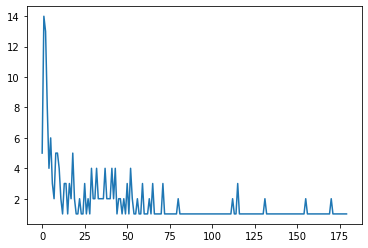

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

304

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.6888888888888889

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2617,50
1,2618,22
2,2619,17
3,2620,8
4,2621,6
...,...,...
66,2698,2
67,2701,1
68,2702,2
69,2703,2


<AxesSubplot:>

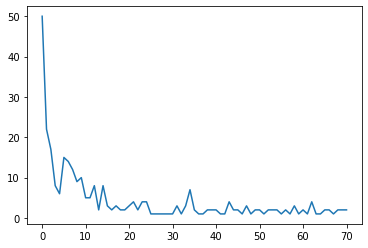

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

304

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

4.28169014084507

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",I got this game when it was in beta. a bit on ...,0,0,5.7,1,1635724800,2704
1,"October 29, 2021","I can't say how perfect is this game, I recomm...",0,0,9.1,1,1635465600,2704
2,"October 27, 2021",if you like survivel and automation games this...,0,0,8.4,1,1635292800,2703
3,"October 25, 2021","This is an amazing game and I love playing it,...",0,0,65.8,1,1635120000,2703
4,"October 18, 2021",I LOVE this game but there are so many bugs (d...,1,0,22.0,-1,1634515200,2702


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2617,156
1,2618,3
2,2619,8
3,2620,8
4,2621,7
...,...,...
66,2698,1
67,2701,0
68,2702,4
69,2703,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2617,54,0,0.0,3.120000
2618,2,0,0.0,0.136364
2619,4,0,0.0,0.470588
2620,7,0,0.0,1.000000
2621,7,0,0.0,1.166667
...,...,...,...,...
2698,1,0,0.5,0.500000
2701,0,0,0.0,0.000000
2702,3,1,2.0,2.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

426

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

1.4013157894736843

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2617,98
1,2618,0
2,2619,0
3,2620,2
4,2621,0
...,...,...
66,2698,1
67,2701,0
68,2702,0
69,2703,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2617,75,0,0.0,1.96
2618,0,0,0.0,0.00
2619,0,0,0.0,0.00
2620,2,0,0.0,0.25
2621,0,0,0.0,0.00
...,...,...,...,...
2698,1,0,0.5,0.50
2701,0,0,0.0,0.00
2702,0,0,0.0,0.00


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

132

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.4342105263157895

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2617,1135.7
1,2618,670.0
2,2619,953.0
3,2620,489.7
4,2621,145.3
...,...,...
66,2698,33.6
67,2701,17.0
68,2702,136.4
69,2703,74.2


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2617,164.8,0.1,15.30,22.714000
2618,154.3,0.2,16.05,30.454545
2619,235.9,3.9,29.90,56.058824
2620,376.2,0.3,15.65,61.212500
2621,44.5,0.9,27.00,24.216667
...,...,...,...,...
2698,26.7,6.9,16.80,16.800000
2701,17.0,17.0,17.00,17.000000
2702,114.4,22.0,68.20,68.200000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

10104.3

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

33.23782894736839

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2617,0.840000
1,2618,0.909091
2,2619,0.882353
3,2620,0.750000
4,2621,0.666667
...,...,...
66,2698,1.000000
67,2701,1.000000
68,2702,-1.000000
69,2703,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2617,1,-1,1.0,0.840000
2618,1,-1,1.0,0.909091
2619,1,-1,1.0,0.882353
2620,1,-1,1.0,0.750000
2621,1,-1,1.0,0.666667
...,...,...,...,...
2698,1,1,1.0,1.000000
2701,1,1,1.0,1.000000
2702,-1,-1,-1.0,-1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

240

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.7894736842105263

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",I got this game when it was in beta. a bit on ...,0,0,5.7,1,1635724800,2704
1,"October 29, 2021","I can't say how perfect is this game, I recomm...",0,0,9.1,1,1635465600,2704
2,"October 27, 2021",if you like survivel and automation games this...,0,0,8.4,1,1635292800,2703
3,"October 25, 2021","This is an amazing game and I love playing it,...",0,0,65.8,1,1635120000,2703
4,"October 18, 2021",I LOVE this game but there are so many bugs (d...,1,0,22.0,-1,1634515200,2702


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",I got this game when it was in beta. a bit on ...,0,0,0.014890,1.0,1.000000,2704
1,"October 29, 2021","I can't say how perfect is this game, I recomm...",0,0,0.023930,1.0,0.995098,2704
2,"October 27, 2021",if you like survivel and automation games this...,0,0,0.022069,1.0,0.991830,2703
3,"October 25, 2021","This is an amazing game and I love playing it,...",0,0,0.174688,1.0,0.988562,2703
4,"October 18, 2021",I LOVE this game but there are so many bugs (d...,1,0,0.058229,0.0,0.977124,2702
...,...,...,...,...,...,...,...,...
299,"April 6, 2020",Jes very gud,0,0,0.289551,1.0,0.062092,2622
300,"April 5, 2020",In love with this game. Kept me busy for hours...,3,1,0.054241,1.0,0.060458,2622
301,"April 4, 2020",Early access sometimes puts up red flags for p...,0,0,0.165913,1.0,0.058824,2622
302,"April 3, 2020",reminds me a bit of Sir! your being hunted.......,0,0,0.028982,1.0,0.057190,2622


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_22964/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2021",I got this game when it was in beta. a bit on ...,0,0,0.014890,1.0,1.000000,2704
1,"October 29, 2021","I can't say how perfect is this game, I recomm...",0,0,0.023930,1.0,0.995098,2704
2,"October 27, 2021",if you like survivel and automation games this...,0,0,0.022069,1.0,0.991830,2703
3,"October 25, 2021","This is an amazing game and I love playing it,...",0,0,0.174688,1.0,0.988562,2703
4,"October 18, 2021",I LOVE this game but there are so many bugs (d...,1,0,0.058229,0.0,0.977124,2702
5,"October 17, 2021",The new update is simply trash.,3,0,0.303909,0.0,0.975490,2702
6,"October 12, 2021",WOW,0,0,0.044935,1.0,0.967320,2701
7,"September 19, 2021",super gooooooooooooooooooooooood game,0,0,0.018080,1.0,0.929739,2698
8,"September 16, 2021",do not buy i have an rtx 80000 and with 15 ext...,1,1,0.070726,1.0,0.924837,2698
9,"September 6, 2021","very fun, even though i went in compleatly blind",0,0,0.020739,1.0,0.908497,2696


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2617    [Love the current development of the game, loo...
2618    [this game is SUPER cool. In my opinion the on...
2619    [The robots sound like vacuum cleaners and it ...
2620    [This is a great game, very relaxing, let's yo...
2621    [at the moment this game is not worth the 20 d...
2622    [It would be nice to have a few more weapons t...
2623    [Very fun mix between Satisfactory and Minecra...
2624    [I think there's a lot of potential here. Felt...
2625    [Great game with a great community!, ., nice g...
2626    [This is a very funny game and the Developer k...
2627    [Has lots of potential. Enjoying the content s...
2628    [This EA game is off to a good start, but it i...
2629    [This concept of programming in the game is so...
2630    [This is a survival acquire/craft/build game. ...
2631    [I love this game, there's so many things to e...
2632    [This game falls between recommend and not rec...
2633    [it is a good game but it needs more vehicles ..

In [52]:
# storing data in JSON format
df_text_list.to_json('mechanica_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('mechanica_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2617  [Love the current development of the game, loo...
1   Review_Text   2618  [this game is SUPER cool. In my opinion the on...
2   Review_Text   2619  [The robots sound like vacuum cleaners and it ...
3   Review_Text   2620  [This is a great game, very relaxing, let's yo...
4   Review_Text   2621  [at the moment this game is not worth the 20 d...
5   Review_Text   2622  [It would be nice to have a few more weapons t...
6   Review_Text   2623  [Very fun mix between Satisfactory and Minecra...
7   Review_Text   2624  [I think there's a lot of potential here. Felt...
8   Review_Text   2625  [Great game with a great community!, ., nice g...
9   Review_Text   2626  [This is a very funny game and the Developer k...
10  Review_Text   2627  [Has lots of potential. Enjoying the content s...
11  Review_Text   2628  [This EA game is off to a good start, but it i...
12  Review_Text   2629  [This concept 

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('mechanica_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_22964/3330918502.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('mechanica_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_22964/2018629910.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('mechanica_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])